In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import glob
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
result=pd.read_csv("processed_data.csv")

KeyboardInterrupt: 

In [19]:
result


,Unnamed: 0,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,...,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Dest,round_time
0,0,11,318,176,0.1,10,1023,100,47,17,...,17.0,10397,13204,101.0,51,0.0,10.0,ATL,MCO,0
1,1,18,315,122,0.0,10,1024,100,38,28,...,6.0,10397,13204,728.0,720,0.0,8.0,ATL,MCO,600
2,2,18,315,122,0.0,10,1024,100,38,28,...,37.0,10397,13930,753.0,725,1.0,28.0,ATL,ORD,600
3,3,18,317,122,0.0,10,1024,100,38,26,...,0.0,10397,13303,838.0,837,0.0,1.0,ATL,MIA,700
4,4,18,317,122,0.0,10,1024,100,38,26,...,0.0,10397,12892,922.0,915,0.0,7.0,ATL,LAX,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,1851431,20,303,113,0.0,10,1014,0,58,22,...,9.0,14771,13930,513.0,519,0.0,0.0,SFO,ORD,2300
1851432,1851432,20,303,113,0.0,10,1014,0,58,22,...,5.0,14771,10397,615.0,632,0.0,0.0,SFO,ATL,2300
1851433,1851433,20,303,113,0.0,10,1014,0,58,22,...,0.0,14771,12478,735.0,750,0.0,0.0,SFO,JFK,2300
1851434,1851434,20,303,113,0.0,10,1014,0,58,22,...,0.0,14771,12478,655.0,704,0.0,0.0,SFO,JFK,2300


In [20]:
target=result["ArrDel15"]

In [21]:
features=result.copy()
features=features.drop(["ArrDel15","Unnamed: 0","date","airport","air","FlightDate","Origin","Dest"],axis=1)

In [22]:
features=features.drop(["ArrDelayMinutes","time","ArrTime","CRSArrTime","time","round_time"],axis=1)

In [23]:
#selector=SelectKBest(f_classif,k=20).fit(features,target)

In [24]:
#cols=selector.get_support(indices=True)

In [25]:
#features_selt=features.iloc[:,cols]

In [26]:
#listing the selected features.
#list(features_selt.columns)

In [27]:
features_selt= features

In [28]:
train_feature,test_feature,train_target,test_target=train_test_split(features_selt,target,test_size=0.25,random_state=42)

In [29]:
#logistic regression classification
LogReg=LogisticRegression()
LogReg.fit(train_feature,train_target)
logit_predict=LogReg.predict(test_feature)

In [30]:
print(classification_report(test_target,logit_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    365657
         1.0       0.89      0.68      0.77     97202

    accuracy                           0.92    462859
   macro avg       0.91      0.83      0.86    462859
weighted avg       0.91      0.92      0.91    462859



In [31]:
 #decision tree classifier
 dtc=DecisionTreeClassifier(random_state=0)
 dtc=dtc.fit(train_feature,train_target)
 tree_pred=dtc.predict(test_feature)
 8

8

In [32]:
print(classification_report(test_target,tree_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    365657
         1.0       0.68      0.70      0.69     97202

    accuracy                           0.87    462859
   macro avg       0.80      0.81      0.80    462859
weighted avg       0.87      0.87      0.87    462859



In [33]:
#xgboost
xgb = GradientBoostingClassifier(random_state=0)
xgb.fit(train_feature,train_target)

GradientBoostingClassifier(random_state=0)

In [34]:
xgb_pred=xgb.predict(test_feature)

In [35]:
print(classification_report(test_target,xgb_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    365657
         1.0       0.90      0.68      0.77     97202

    accuracy                           0.92    462859
   macro avg       0.91      0.83      0.86    462859
weighted avg       0.92      0.92      0.91    462859



In [36]:
#extra tree classifier
etc=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc.fit(train_feature,train_target)
extratree_pred=etc.predict(test_feature)


In [38]:

print(classification_report(test_target,extratree_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    365657
         1.0       0.81      0.73      0.77     97202

    accuracy                           0.91    462859
   macro avg       0.87      0.84      0.86    462859
weighted avg       0.91      0.91      0.91    462859



In [39]:
#oversampling method
#os = oversampling
os=SMOTE(random_state=2)
train_feature_os,train_target_os= os.fit_sample(train_feature,train_target)

In [40]:
#logistic reg
LogReg_os=LogisticRegression()
LogReg_os.fit(train_feature_os,train_target_os)
logit_predict_os=LogReg_os.predict(test_feature)

In [41]:
print(classification_report(test_target,logit_predict_os))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    365657
         1.0       0.74      0.78      0.76     97202

    accuracy                           0.90    462859
   macro avg       0.84      0.85      0.85    462859
weighted avg       0.90      0.90      0.90    462859



In [42]:
#decision tree classifier
dtc_os=DecisionTreeClassifier()
dtc_os.fit(train_feature_os,train_target_os)
tree_pred_os=dtc_os.predict(test_feature)

In [43]:
print(classification_report(test_target,tree_pred_os))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    365657
         1.0       0.66      0.70      0.68     97202

    accuracy                           0.86    462859
   macro avg       0.79      0.81      0.80    462859
weighted avg       0.87      0.86      0.86    462859



In [44]:
#xgboost
xgb_os = GradientBoostingClassifier(random_state=0)
xgb_os.fit(train_feature_os,train_target_os)
xgb_pred_os=xgb_os.predict(test_feature)

In [45]:
print(classification_report(test_target,xgb_pred_os))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    365657
         1.0       0.81      0.74      0.77     97202

    accuracy                           0.91    462859
   macro avg       0.87      0.85      0.86    462859
weighted avg       0.91      0.91      0.91    462859



In [46]:
#extra tree classifier
etc_os=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc_os.fit(train_feature_os,train_target_os)
extratree_pred_os=etc_os.predict(test_feature)


In [47]:
print(classification_report(test_target,extratree_pred_os))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    365657
         1.0       0.77      0.75      0.76     97202

    accuracy                           0.90    462859
   macro avg       0.85      0.85      0.85    462859
weighted avg       0.90      0.90      0.90    462859



In [48]:
print(len(list(np.where(extratree_pred_os==1.0)[0])))

95185


In [49]:
print(len(list(np.where(test_target==1.0)[0])))

97202


In [50]:
#under-sampling
#us- under sampling
us =NearMiss()
train_feature_us,train_target_us=  us.fit_sample(train_feature,train_target)

In [51]:
#logistic reg
LogReg_us=LogisticRegression()
LogReg_us.fit(train_feature_us,train_target_us)
logit_predict_us=LogReg_us.predict(test_feature)

In [52]:
print(classification_report(test_target,logit_predict_us))


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87    365657
         1.0       0.53      0.78      0.63     97202

    accuracy                           0.81    462859
   macro avg       0.73      0.80      0.75    462859
weighted avg       0.85      0.81      0.82    462859



In [53]:
#decision tree classifier
dtc_us=DecisionTreeClassifier()
dtc_us.fit(train_feature_us,train_target_us)
tree_pred_us=dtc_us.predict(test_feature)

In [54]:
print(classification_report(test_target,tree_pred_us))

              precision    recall  f1-score   support

         0.0       0.93      0.62      0.75    365657
         1.0       0.37      0.83      0.51     97202

    accuracy                           0.67    462859
   macro avg       0.65      0.73      0.63    462859
weighted avg       0.81      0.67      0.70    462859



In [55]:
#xgboost
xgb_us = GradientBoostingClassifier(random_state=0)
xgb_us.fit(train_feature_us,train_target_us)
xgb_pred_us=xgb_us.predict(test_feature)

In [56]:
print(classification_report(test_target,xgb_pred_us))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.86    365657
         1.0       0.50      0.82      0.62     97202

    accuracy                           0.79    462859
   macro avg       0.72      0.80      0.74    462859
weighted avg       0.85      0.79      0.81    462859



In [57]:
#extra tree classifier
etc_us=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc_us.fit(train_feature_us,train_target_us)
extratree_pred_us=etc_us.predict(test_feature)

In [58]:
print(classification_report(test_target,extratree_pred_us))

              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80    365657
         1.0       0.42      0.85      0.56     97202

    accuracy                           0.72    462859
   macro avg       0.68      0.77      0.68    462859
weighted avg       0.84      0.72      0.75    462859



In [59]:
Arr_del_index=list(test_feature.index)


In [60]:
test_feature["ArrDelayMinutes"]=result["ArrDelayMinutes"][Arr_del_index]

In [61]:
test_feature

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDelayMinutes
1778209,11,55,113,0.0,10,1013,0,29,16,64,...,2017,10,9,923.0,0.0,930,0.0,14771,12892,26.0
737512,22,242,113,0.0,10,1016,1,32,37,39,...,2017,1,1,650.0,0.0,700,0.0,12478,13303,0.0
36012,18,152,122,0.0,10,1014,100,61,24,67,...,2016,3,31,1125.0,1.0,1050,35.0,10397,12892,33.0
1079740,25,295,116,0.0,10,1009,33,55,27,69,...,2017,4,27,1207.0,1.0,1130,37.0,12892,14747,39.0
1093872,15,229,113,0.0,10,1012,0,58,18,72,...,2017,6,15,1402.0,0.0,1400,2.0,12892,14771,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518264,11,253,113,0.0,10,1024,44,11,12,21,...,2016,2,12,951.0,0.0,953,0.0,11618,13930,0.0
1102305,11,222,113,0.0,10,1015,0,68,13,88,...,2017,7,14,1109.0,0.0,1110,0.0,12892,12478,17.0
1347538,10,281,113,0.0,5,1019,44,38,17,40,...,2016,5,15,505.0,0.0,500,5.0,13930,12266,2.0
461598,14,330,113,0.0,10,1020,0,36,16,57,...,2017,2,15,1904.0,0.0,1905,0.0,11298,11292,0.0


In [62]:
test_feature["pred"]=extratree_pred_os

In [63]:
test_feature

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDelayMinutes,pred
1778209,11,55,113,0.0,10,1013,0,29,16,64,...,10,9,923.0,0.0,930,0.0,14771,12892,26.0,0.0
737512,22,242,113,0.0,10,1016,1,32,37,39,...,1,1,650.0,0.0,700,0.0,12478,13303,0.0,0.0
36012,18,152,122,0.0,10,1014,100,61,24,67,...,3,31,1125.0,1.0,1050,35.0,10397,12892,33.0,0.0
1079740,25,295,116,0.0,10,1009,33,55,27,69,...,4,27,1207.0,1.0,1130,37.0,12892,14747,39.0,1.0
1093872,15,229,113,0.0,10,1012,0,58,18,72,...,6,15,1402.0,0.0,1400,2.0,12892,14771,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518264,11,253,113,0.0,10,1024,44,11,12,21,...,2,12,951.0,0.0,953,0.0,11618,13930,0.0,0.0
1102305,11,222,113,0.0,10,1015,0,68,13,88,...,7,14,1109.0,0.0,1110,0.0,12892,12478,17.0,0.0
1347538,10,281,113,0.0,5,1019,44,38,17,40,...,5,15,505.0,0.0,500,5.0,13930,12266,2.0,0.0
461598,14,330,113,0.0,10,1020,0,36,16,57,...,2,15,1904.0,0.0,1905,0.0,11298,11292,0.0,0.0


In [64]:
test_feature=test_feature[test_feature["pred"]==1.0]

In [65]:
test_feature

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDelayMinutes,pred
1079740,25,295,116,0.0,10,1009,33,55,27,69,...,4,27,1207.0,1.0,1130,37.0,12892,14747,39.0,1.0
550997,24,278,122,0.0,10,1027,22,12,31,22,...,1,8,1415.0,1.0,1344,31.0,11618,13204,23.0,1.0
639641,16,163,113,0.1,10,1012,25,74,18,92,...,8,4,2106.0,1.0,1915,111.0,12266,13204,102.0,1.0
1796216,9,10,113,0.0,10,1022,70,48,14,51,...,12,28,1734.0,1.0,1650,44.0,14771,12889,40.0,1.0
1002634,8,197,119,0.0,10,1013,78,68,10,76,...,7,28,1150.0,1.0,1016,94.0,12892,11298,104.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768695,3,76,113,0.0,10,1015,0,52,3,68,...,9,26,841.0,0.0,845,0.0,14771,11292,0.0,1.0
402881,22,188,113,0.0,10,1006,0,49,26,84,...,3,14,1527.0,1.0,1450,37.0,11298,13930,27.0,1.0
730024,9,196,113,0.0,10,1017,0,65,10,76,...,8,5,1117.0,1.0,959,78.0,12478,14107,42.0,1.0
989158,9,167,113,0.0,10,1012,20,57,10,62,...,6,14,22.0,1.0,2240,102.0,12892,11057,86.0,1.0


In [66]:
test_feature=test_feature.drop(["pred"],axis=1)

In [67]:
test_feature.to_csv("pipeline_data.csv")

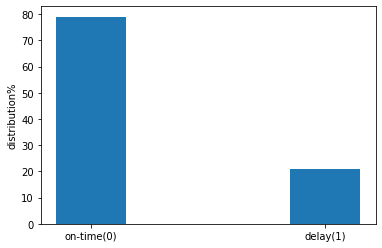

In [68]:
y= [79,21]
x=['on-time(0)','delay(1)']
plt.bar(x,y,width=0.3)
 
plt.ylabel("distribution%") 
plt.savefig("classplot.png")